# IMPLEMENTATION OF NAIVE BAYES

# Neeraj Joshi
# Roll No - 120
# Aiml Batch 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("decision.csv")

In [3]:
df.head()

,RID,Age,income,student,credit_range,buy,Unnamed: 6
0,1,youth,high,no,fair,no,NaN
1,2,youth,high,no,excellent,no,NaN
2,3,middle,high,no,fair,yes,NaN
3,4,senior,medium,no,fair,yes,NaN
4,5,senior,low,yes,fair,yes,NaN


In [4]:
df.describe()

,RID,Unnamed: 6
count,14.0000,0.0
mean,7.5000,NaN
std,4.1833,NaN
min,1.0000,NaN
25%,4.2500,NaN
50%,7.5000,NaN
75%,10.7500,NaN
max,14.0000,NaN


Text(0, 0.5, 'FREQUENCY')

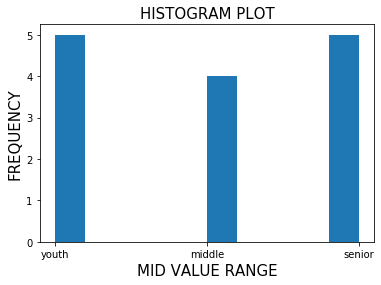

In [5]:
plt.hist(df['Age'])
plt.title('HISTOGRAM PLOT' , fontsize = 15)
plt.xlabel('MID VALUE RANGE' , fontsize = 15)
plt.ylabel('FREQUENCY' , fontsize = 15)

# X = (age = youth, income = medium, student = yes, credit rating = fair)

In [6]:
buy_yes = (df.buy == 'yes').sum()
buy_no = (df.buy == 'no').sum()

In [7]:
#Probability

p_yes = buy_yes/df['buy'].count()
p_no = buy_no/df['buy'].count()

print(p_yes)
print(p_no)

0.6428571428571429
0.35714285714285715


# conditional probabilities

In [8]:
age = df.pivot_table(index=['Age','buy'], aggfunc='size')

age

Age     buy
middle  yes    4
senior  no     2
        yes    3
youth   no     3
        yes    2
dtype: int64

In [9]:
p_youth_yes = age[4]/buy_yes
p_youth_no =  age[3]/buy_no

print(p_youth_yes)
print(p_youth_no)

0.2222222222222222
0.6


In [10]:
income = df.pivot_table(index=['income','buy'], aggfunc='size')

In [11]:
income

income  buy
high    no     2
        yes    2
low     no     1
        yes    3
medium  no     2
        yes    4
dtype: int64

In [12]:
p_medium_yes = income[5]/buy_yes
p_medium_no =  income[4]/buy_no

print(p_medium_yes)
print(p_medium_no)

0.4444444444444444
0.4


In [13]:
student = df.pivot_table(index=['student','buy'], aggfunc='size')

student

student  buy
no       no     4
         yes    3
yes      no     1
         yes    6
dtype: int64

In [14]:
p_student_yes = student[3]/buy_yes
p_student_no =  student[2]/buy_no

print(p_student_yes)
print(p_student_no)

0.6666666666666666
0.2


In [15]:
credit = df.pivot_table(index=['credit_range','buy'], aggfunc='size')

credit

credit_range  buy
excellent     no     3
              yes    3
fair          no     2
              yes    6
dtype: int64

In [16]:
p_fair_yes = credit[3]/buy_yes
p_fair_no =  credit[2]/buy_no

print(p_fair_yes)
print(p_fair_no)

0.6666666666666666
0.4


# P(X|buys computer = yes) & P(X|buys computer = no)

In [17]:
p_buy_yes = p_youth_yes * p_medium_yes * p_student_yes * p_fair_yes 


p_buy_no = p_youth_no * p_medium_no * p_student_no * p_fair_no 

print(p_buy_yes)
print(p_buy_no)

0.04389574759945129
0.019200000000000002


# maximize P(X|Ci)P(Ci)

In [18]:
P_yes = p_buy_yes * p_yes
P_no =  p_buy_no * p_no

print(P_yes)
print(P_no)

0.028218694885361547
0.006857142857142858
